##     HOUSING PRICE PREDICTION MODEL USING REGRESSION

Importing the pre-requisite libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv(r'C:\Users\bryan\Downloads\AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Information for each column can be found at : http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


In [5]:
#Dropping the unnecessary ID column
df.drop('PID',axis=1,inplace=True)

**Using scatterplots to identify outliers**

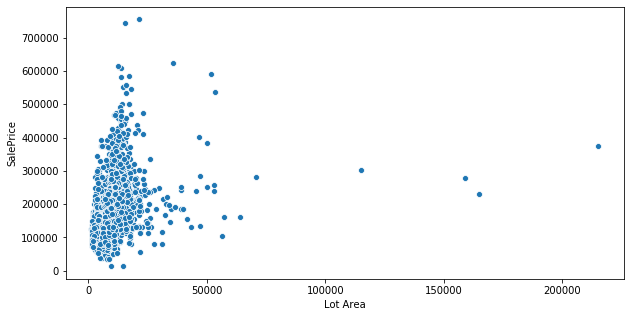

In [6]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Lot Area',y='SalePrice',data=df)

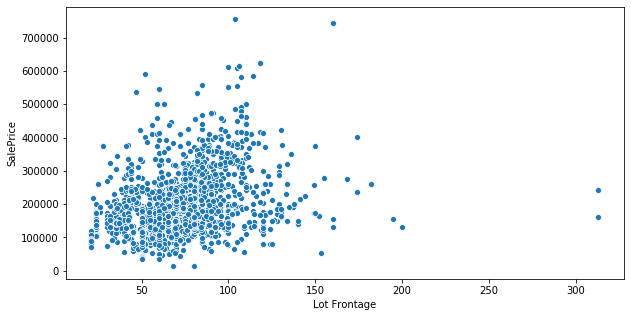

In [7]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Lot Frontage',y='SalePrice',data=df)

In [8]:
df[(df['SalePrice']>700000) & (df['Lot Frontage']<175)]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1760,1761,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1767,1768,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [9]:
df[(df['SalePrice']>700000) & (df['Lot Area']<50000)]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1760,1761,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1767,1768,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [10]:
df[(df['SalePrice']<400000) & (df['Lot Area']>100000)]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
956,957,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
1570,1571,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
2071,2072,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
2115,2116,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000


In [11]:
df[(df['SalePrice']<300000) & (df['Lot Frontage']>300)]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1265,1266,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1498,1499,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


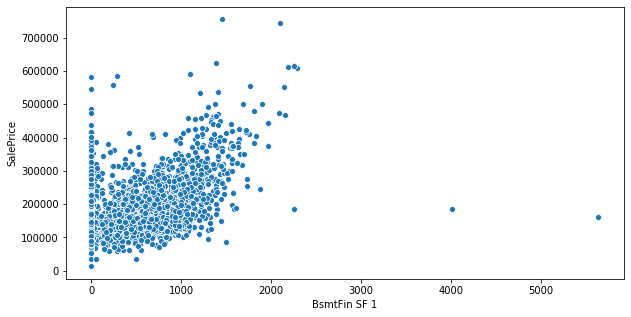

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='BsmtFin SF 1',y='SalePrice',data=df)

In [13]:
df[(df['SalePrice']<300000) & (df['BsmtFin SF 1']>3000)]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,1499,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850


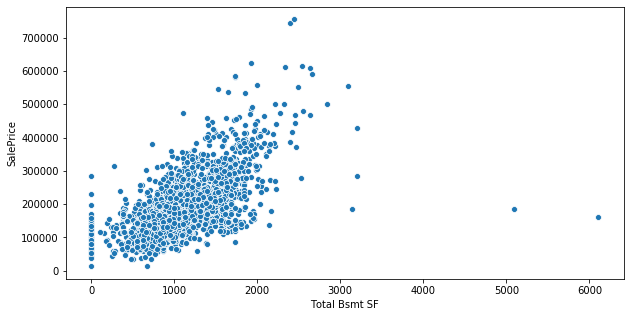

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Total Bsmt SF',y='SalePrice',data=df)

In [15]:
df[(df['SalePrice']<300000) & (df['Total Bsmt SF']>4000)]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,1499,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850


In [16]:
df[(df['SalePrice']>700000) & (df['Total Bsmt SF']<3000)]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1760,1761,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1767,1768,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [17]:
indices=[1760,1767,956,1570,2071,2115,1265,1498,2180]

#Percentage of data to be dropped
round(len(indices)/len(df)*100,2)


0.31

In [18]:
df.drop(indices,axis=0,inplace=True)

**Now identifying columns with missing data**

In [19]:
def missing(df):
    global perc_miss
    perc_miss=df.isnull().sum()/len(df)*100
    perc_miss=perc_miss[perc_miss>0].sort_values()
    return perc_miss

In [20]:
df_isnull=missing(df)
df_isnull

Electrical         0.034235
Garage Area        0.034235
Total Bsmt SF      0.034235
Bsmt Unf SF        0.034235
BsmtFin SF 1       0.034235
BsmtFin SF 2       0.034235
Garage Cars        0.034235
Bsmt Full Bath     0.068470
Bsmt Half Bath     0.068470
Mas Vnr Area       0.787402
Mas Vnr Type       0.787402
BsmtFin Type 1     2.738788
Bsmt Qual          2.738788
Bsmt Cond          2.738788
BsmtFin Type 2     2.773023
Bsmt Exposure      2.841493
Garage Type        5.374872
Garage Finish      5.443341
Garage Qual        5.443341
Garage Cond        5.443341
Garage Yr Blt      5.443341
Lot Frontage      16.672372
Fireplace Qu      48.681958
Fence             80.451900
Alley             93.221499
Misc Feature      96.473810
Pool QC           99.623417
dtype: float64

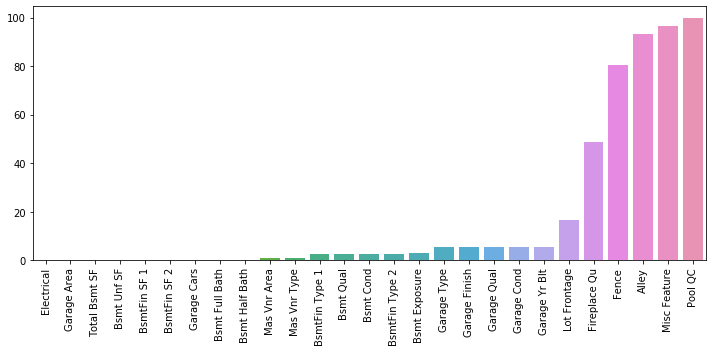

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_isnull.index,y=perc_miss)
plt.xticks(rotation=90)
plt.tight_layout()

Since some featues have a very small percentage of missing data, we can drop those rows altogether. Let us set a threshold of 2% data that can be dropped

In [22]:
missing_1=list(perc_miss[perc_miss<=1].index)  # Extracting the Features having less than or equal to 1% missing data
missing_1

['Electrical',
 'Garage Area',
 'Total Bsmt SF',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Garage Cars',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Mas Vnr Area',
 'Mas Vnr Type']

In [23]:
df=df.dropna(axis=0,subset=missing_1)

In [24]:
df_miss_great1=list(perc_miss[perc_miss>1].index)  # Extracting the Features having more than 1% missing data
df_miss_great1

['BsmtFin Type 1',
 'Bsmt Qual',
 'Bsmt Cond',
 'BsmtFin Type 2',
 'Bsmt Exposure',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Garage Yr Blt',
 'Lot Frontage',
 'Fireplace Qu',
 'Fence',
 'Alley',
 'Misc Feature',
 'Pool QC']

In [25]:
print(df['BsmtFin Type 1'].value_counts())
df[df['BsmtFin Type 1'].isnull()]['BsmtFin Type 1']     

GLQ    842
Unf    839
ALQ    426
Rec    286
BLQ    269
LwQ    154
Name: BsmtFin Type 1, dtype: int64


83      NaN
154     NaN
206     NaN
243     NaN
273     NaN
       ... 
2739    NaN
2744    NaN
2879    NaN
2892    NaN
2903    NaN
Name: BsmtFin Type 1, Length: 78, dtype: object

In [26]:
# The following features have string values and define the Basement characteristics
basement_str_feats=['BsmtFin Type 1','Bsmt Qual','Bsmt Cond', 'BsmtFin Type 2','Bsmt Exposure']

In [27]:
df[basement_str_feats]=df[basement_str_feats].fillna('None')

In [28]:
df[basement_str_feats].isnull().sum()

BsmtFin Type 1    0
Bsmt Qual         0
Bsmt Cond         0
BsmtFin Type 2    0
Bsmt Exposure     0
dtype: int64

In [29]:
# The following features have string values and define the garage characteristics
garage_data=['Garage Type','Garage Finish','Garage Qual','Garage Cond']

In [30]:
df[garage_data]=df[garage_data].fillna('None')

In [31]:
df[garage_data].isnull().sum()

Garage Type      0
Garage Finish    0
Garage Qual      0
Garage Cond      0
dtype: int64

In [32]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.329787
ClearCr    88.150000
CollgCr    71.325688
Crawfor    69.951807
Edwards    64.775862
Gilbert    74.345455
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      74.574866
NPkVill    28.142857
NWAmes     81.517647
NoRidge    90.076923
NridgHt    83.925466
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.704762
Somerst    64.111111
StoneBr    62.173913
Timber     80.277778
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [33]:
#Lot frontage is a continuos variable. Hence we can fill in the missing values with the mean of the entire feature
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))
df['Lot Frontage'].isnull().sum()

3

In [34]:
df[df['Lot Frontage'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2256,2257,120,RM,NaN,9763,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,WD,Normal,330000
2788,2789,160,RH,NaN,3612,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,137000
2892,2893,120,RM,NaN,8239,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,230000


In [35]:
df.drop([2256,2788,2892],axis=0,inplace=True)

In [36]:
df[df['Lot Frontage'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [37]:
#Computing the ages of the Garage from the 'Garage Yr Blt' feature
df['Garage Age']=df['Garage Yr Blt'].max()-df['Garage Yr Blt']

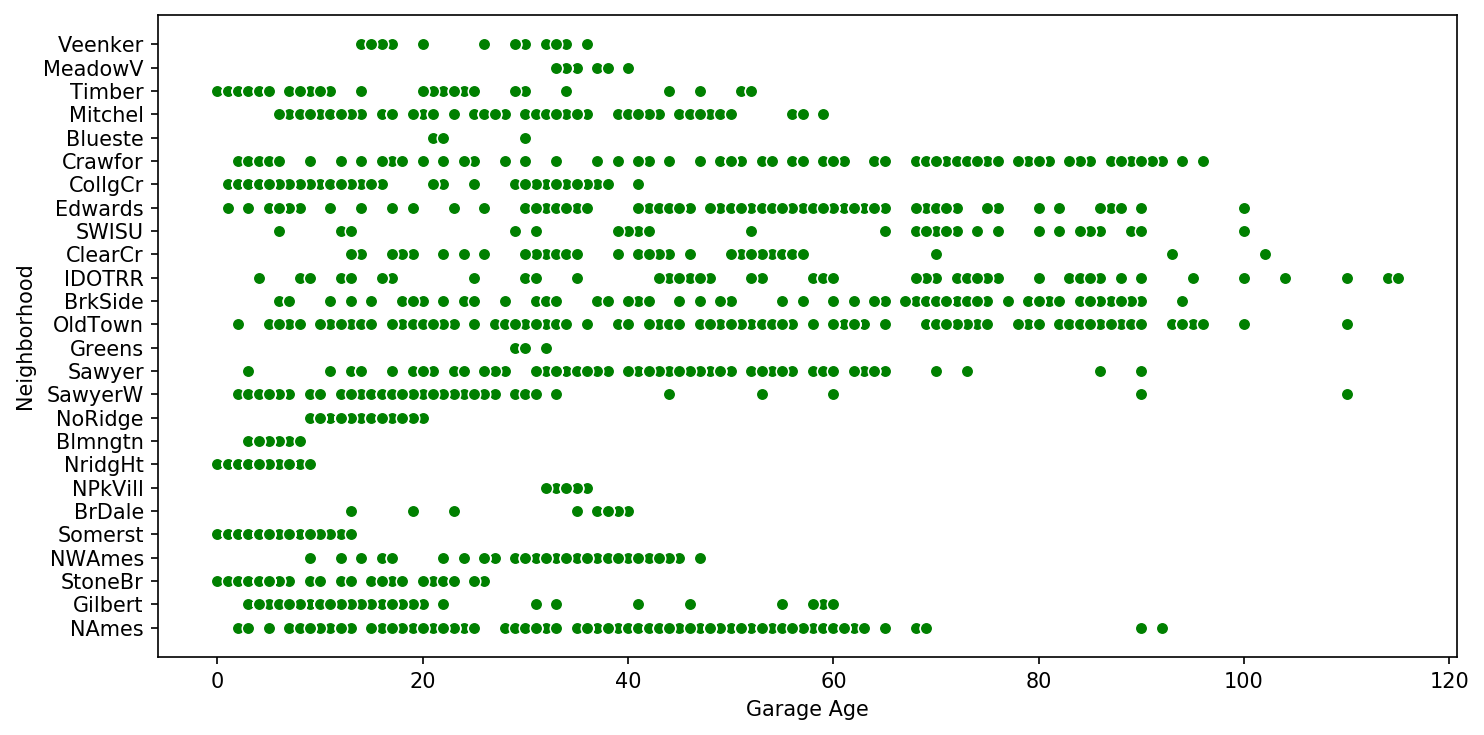

In [38]:
plt.figure(figsize=(10,5),dpi=150)
sns.scatterplot(x='Garage Age',y='Neighborhood',data=df,color='green')
plt.tight_layout()

In [39]:
#Finding the indices of the outliers
print(df[(df['Garage Age']>70) & (df['Neighborhood']=='NAmes')].index)
print(df[(df['Garage Age']>80) & (df['Neighborhood']=='Sawyer')].index)

Int64Index([629, 2570], dtype='int64')
Int64Index([1386, 2722], dtype='int64')


In [40]:
df.drop([629,2570,1386,2722],axis=0,inplace=True)

In [41]:
df.groupby('Neighborhood')['Garage Age'].mean()

Neighborhood
Blmngtn     4.928571
Blueste    27.400000
BrDale     35.827586
BrkSide    61.821053
ClearCr    41.048780
CollgCr    11.467681
Crawfor    52.813725
Edwards    44.662338
Gilbert    11.612500
Greens     30.625000
IDOTRR     61.819444
MeadowV    36.840000
Mitchel    27.462264
NAmes      45.702326
NPkVill    33.652174
NWAmes     34.251908
NoRidge    14.521739
NridgHt     4.317073
OldTown    60.187500
SWISU      65.500000
Sawyer     41.174825
SawyerW    19.836207
Somerst     5.406977
StoneBr    10.529412
Timber     13.691176
Veenker    28.291667
Name: Garage Age, dtype: float64

In [42]:
#Filling in the missing garage age values with the mean of the coressponding neighborhood values
df['Garage Age']=df.groupby('Neighborhood')['Garage Age'].transform(lambda val: val.fillna(val.mean()))
df['Garage Age'].isnull().sum()

0

In [43]:
#The Fireplace Qu feature indicates the fireplace quality.It is reasonable to assume that the NA values in this feature, 
#indicate a non existant fireplace. Thus we can replace "NA" with "None"

df['Fireplace Qu']=df['Fireplace Qu'].fillna('None')
df['Fireplace Qu'].isnull().sum()

0

The features namely, Fence, Alley, Misc Feature and Pool QC have too much missing data and thus the entire Features can be dropped

In [44]:
to_drop=['Fence','Alley','Misc Feature','Pool QC','Garage Yr Blt']
df.drop(to_drop,axis=1,inplace=True)

In [45]:
missing(df)

Series([], dtype: float64)

The above cell shows that there is no missing data in the DataFrame df

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2887 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2887 non-null   int64  
 1   MS SubClass      2887 non-null   int64  
 2   MS Zoning        2887 non-null   object 
 3   Lot Frontage     2887 non-null   float64
 4   Lot Area         2887 non-null   int64  
 5   Street           2887 non-null   object 
 6   Lot Shape        2887 non-null   object 
 7   Land Contour     2887 non-null   object 
 8   Utilities        2887 non-null   object 
 9   Lot Config       2887 non-null   object 
 10  Land Slope       2887 non-null   object 
 11  Neighborhood     2887 non-null   object 
 12  Condition 1      2887 non-null   object 
 13  Condition 2      2887 non-null   object 
 14  Bldg Type        2887 non-null   object 
 15  House Style      2887 non-null   object 
 16  Overall Qual     2887 non-null   int64  
 17  Overall Cond  

In [47]:
#percentage of data dropped is:
round((1-2887 /2930.3)*100,2)

1.48

Since the data has been cleaned, we can now progress with the Linear Regression predictive model

## Linear Regression

For Regression, we can only use continuous data. Thus we will have to split the data set into continuous and categorical data

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [49]:
#Creating a function to extract only the continous features from df
cont_data=[]
cat_data=[]
def data_type(data):
    for col in data:
        if df[col].dtype=='float64' or df[col].dtype=='int64':
            cont_data.append(col) 
        else:
            cat_data.append(col)
    return cont_data

In [50]:
#Continuous features of df
cont_cols=data_type(df.columns)
cont_cols

['Order',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice',
 'Garage Age']

In [51]:
#Since some of these have categorical numberical data, the features of use will have to be manually selected
features_of_interest=cont_cols[2:4]+cont_cols[8:17]+cont_cols[25:29]+cont_cols[32:33]+cont_cols[37:38]
features_of_interest

['Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Pool Area',
 'Garage Age']

In [52]:
x=df[features_of_interest]
y=df['SalePrice']

In [53]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=101)

In [54]:
#Standardize that data as they are in different units for each feature. This will improve model accuracy
scaler=StandardScaler()

In [55]:
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [56]:
lm=LinearRegression()

In [57]:
lm.fit(xtrain,ytrain)
print("The linear regression coefficients are: \n",lm.coef_)
yhat=lm.predict(xtest)

The linear regression coefficients are: 
 [  1636.3422462     959.32080714   8172.25715314  12192.70055752
   1030.53973699   1030.34236195  14077.21108114  11106.83545657
  11814.13703555  -1251.76610185  18679.9928602    8078.98775212
   3396.01186607   2999.30339165   1770.00084366    882.646894
 -15195.07523203]


Importing the Evaluation Metrics

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [59]:
print('Mean Absolute Error: ',round(mean_absolute_error(ytest,yhat),2))
print('Mean Squared Error: ',round(np.sqrt(mean_squared_error(ytest,yhat)),2))

Mean Absolute Error:  25842.32
Mean Squared Error:  36620.58


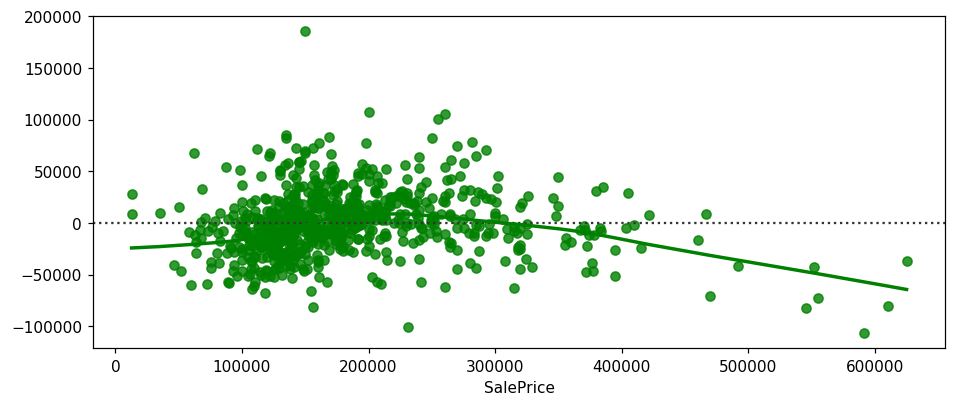

In [60]:
#Residual Plot:
plt.figure(figsize=(10,4),dpi=110)
sns.residplot(ytest,yhat,lowess=True,color='g')

**Elastic Net (Regularized linear regression)**

In [61]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [62]:
base_net=ElasticNet()

In [63]:
paramgrid={'alpha':[0.1,1,10,100,110,1000],'l1_ratio':[0.01,0.05,0.1,0.15,0.25,0.5,0.75,0.90,0.99,1],'max_iter':[10000]}
grid=GridSearchCV(estimator=base_net, param_grid=paramgrid,scoring='neg_mean_squared_error',cv=5,verbose=2)

In [64]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] alpha=0.1, l1_ratio=0.01, max_iter=10000 ........................
[CV] ......... alpha=0.1, l1_ratio=0.01, max_iter=10000, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.01, max_iter=10000 ........................
[CV] ......... alpha=0.1, l1_ratio=0.01, max_iter=10000, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.01, max_iter=10000 ........................
[CV] ......... alpha=0.1, l1_ratio=0.01, max_iter=10000, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.01, max_iter=10000 ........................
[CV] ......... alpha=0.1, l1_ratio=0.01, max_iter=10000, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.01, max_iter=10000 ........................
[CV] ......... alpha=0.1, l1_ratio=0.01, max_iter=10000, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.05, max_iter=10000 ........................
[CV] ......... alpha=0.1, l1_ratio=0.05, max_iter=10000, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.05, max_iter=10000 ........................
[CV] ......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... alpha=0.1, l1_ratio=0.9, max_iter=10000, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.9, max_iter=10000 .........................
[CV] .......... alpha=0.1, l1_ratio=0.9, max_iter=10000, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.9, max_iter=10000 .........................
[CV] .......... alpha=0.1, l1_ratio=0.9, max_iter=10000, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.9, max_iter=10000 .........................
[CV] .......... alpha=0.1, l1_ratio=0.9, max_iter=10000, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.99, max_iter=10000 ........................
[CV] ......... alpha=0.1, l1_ratio=0.99, max_iter=10000, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.99, max_iter=10000 ........................
[CV] ......... alpha=0.1, l1_ratio=0.99, max_iter=10000, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.99, max_iter=10000 ........................
[CV] ......... alpha=0.1, l1_ratio=0.99, max_iter=10000, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.99, max_iter=10000 ........................
[CV] .

C:\Users\bryan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2174903475.9382324, tolerance: 1024599784.8623391
  positive)


[CV] ............ alpha=0.1, l1_ratio=1, max_iter=10000, total=   0.2s
[CV] alpha=0.1, l1_ratio=1, max_iter=10000 ...........................
[CV] ............ alpha=0.1, l1_ratio=1, max_iter=10000, total=   0.0s
[CV] alpha=0.1, l1_ratio=1, max_iter=10000 ...........................
[CV] ............ alpha=0.1, l1_ratio=1, max_iter=10000, total=   0.0s
[CV] alpha=0.1, l1_ratio=1, max_iter=10000 ...........................
[CV] ............ alpha=0.1, l1_ratio=1, max_iter=10000, total=   0.0s
[CV] alpha=0.1, l1_ratio=1, max_iter=10000 ...........................
[CV] ............ alpha=0.1, l1_ratio=1, max_iter=10000, total=   0.0s
[CV] alpha=1, l1_ratio=0.01, max_iter=10000 ..........................
[CV] ........... alpha=1, l1_ratio=0.01, max_iter=10000, total=   0.0s
[CV] alpha=1, l1_ratio=0.01, max_iter=10000 ..........................
[CV] ........... alpha=1, l1_ratio=0.01, max_iter=10000, total=   0.0s
[CV] alpha=1, l1_ratio=0.01, max_iter=10000 ..........................
[CV] .

C:\Users\bryan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2214015940.4836426, tolerance: 1024599784.8623391
  positive)


[CV] .............. alpha=1, l1_ratio=1, max_iter=10000, total=   0.2s
[CV] alpha=1, l1_ratio=1, max_iter=10000 .............................
[CV] .............. alpha=1, l1_ratio=1, max_iter=10000, total=   0.0s
[CV] alpha=1, l1_ratio=1, max_iter=10000 .............................
[CV] .............. alpha=1, l1_ratio=1, max_iter=10000, total=   0.0s
[CV] alpha=1, l1_ratio=1, max_iter=10000 .............................
[CV] .............. alpha=1, l1_ratio=1, max_iter=10000, total=   0.0s
[CV] alpha=1, l1_ratio=1, max_iter=10000 .............................
[CV] .............. alpha=1, l1_ratio=1, max_iter=10000, total=   0.0s
[CV] alpha=10, l1_ratio=0.01, max_iter=10000 .........................
[CV] .......... alpha=10, l1_ratio=0.01, max_iter=10000, total=   0.0s
[CV] alpha=10, l1_ratio=0.01, max_iter=10000 .........................
[CV] .......... alpha=10, l1_ratio=0.01, max_iter=10000, total=   0.0s
[CV] alpha=10, l1_ratio=0.01, max_iter=10000 .........................
[CV] .

[CV] .......... alpha=100, l1_ratio=0.9, max_iter=10000, total=   0.0s
[CV] alpha=100, l1_ratio=0.99, max_iter=10000 ........................
[CV] ......... alpha=100, l1_ratio=0.99, max_iter=10000, total=   0.0s
[CV] alpha=100, l1_ratio=0.99, max_iter=10000 ........................
[CV] ......... alpha=100, l1_ratio=0.99, max_iter=10000, total=   0.0s
[CV] alpha=100, l1_ratio=0.99, max_iter=10000 ........................
[CV] ......... alpha=100, l1_ratio=0.99, max_iter=10000, total=   0.0s
[CV] alpha=100, l1_ratio=0.99, max_iter=10000 ........................
[CV] ......... alpha=100, l1_ratio=0.99, max_iter=10000, total=   0.0s
[CV] alpha=100, l1_ratio=0.99, max_iter=10000 ........................
[CV] ......... alpha=100, l1_ratio=0.99, max_iter=10000, total=   0.0s
[CV] alpha=100, l1_ratio=1, max_iter=10000 ...........................
[CV] ............ alpha=100, l1_ratio=1, max_iter=10000, total=   0.0s
[CV] alpha=100, l1_ratio=1, max_iter=10000 ...........................
[CV] .

[CV] ............ alpha=110, l1_ratio=1, max_iter=10000, total=   0.0s
[CV] alpha=110, l1_ratio=1, max_iter=10000 ...........................
[CV] ............ alpha=110, l1_ratio=1, max_iter=10000, total=   0.0s
[CV] alpha=110, l1_ratio=1, max_iter=10000 ...........................
[CV] ............ alpha=110, l1_ratio=1, max_iter=10000, total=   0.0s
[CV] alpha=1000, l1_ratio=0.01, max_iter=10000 .......................
[CV] ........ alpha=1000, l1_ratio=0.01, max_iter=10000, total=   0.0s
[CV] alpha=1000, l1_ratio=0.01, max_iter=10000 .......................
[CV] ........ alpha=1000, l1_ratio=0.01, max_iter=10000, total=   0.0s
[CV] alpha=1000, l1_ratio=0.01, max_iter=10000 .......................
[CV] ........ alpha=1000, l1_ratio=0.01, max_iter=10000, total=   0.0s
[CV] alpha=1000, l1_ratio=0.01, max_iter=10000 .......................
[CV] ........ alpha=1000, l1_ratio=0.01, max_iter=10000, total=   0.0s
[CV] alpha=1000, l1_ratio=0.01, max_iter=10000 .......................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 1, 10, 100, 110, 1000],
                         'l1_ratio': [0.01, 0.05, 0.1, 0.15, 0.25, 0.5, 0.75,
                                      0.9, 0.99, 1],
                         'max_iter': [10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

In [65]:
grid.best_params_

{'alpha': 1000, 'l1_ratio': 1, 'max_iter': 10000}

In [66]:
yhat2=grid.predict(xtest)

In [67]:
#Now evaluating the metrics
print('Mean Absolute Error: ',round(mean_absolute_error(ytest,yhat2),2))
print('Mean Squared Error: ',round(np.sqrt(mean_squared_error(ytest,yhat2)),2))

Mean Absolute Error:  25901.08
Mean Squared Error:  36890.24


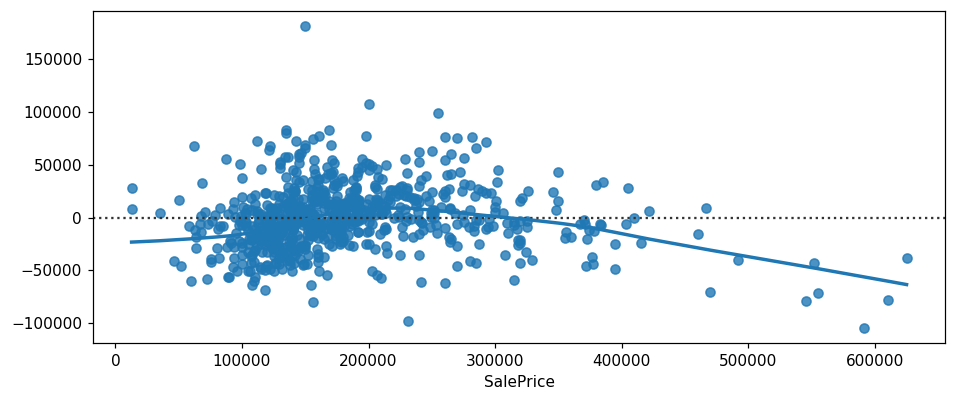

In [68]:
#Residual Plot:
plt.figure(figsize=(10,4),dpi=110)
sns.residplot(ytest,yhat2,lowess=True)

Lastly, let's perform **Polynomial Regression** to check whether it is a better fit for the dataset

In [69]:
from sklearn.preprocessing import PolynomialFeatures

In [70]:
rmse_errors = []

for d in range(1,5):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(x)
    
    # SPLIT THIS NEW POLY DATA SET
    xtrain, xtest, ytrain, ytest = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(xtrain,ytrain)
    
    # PREDICT ON BOTH TRAIN AND TEST
    y_pred = model.predict(xtest)
    
    # Calculate Errors
    
    # Errors on Train Set
    RMSE = np.sqrt(mean_squared_error(ytest,y_pred))
    
    # Append errors to lists for plotting later
       
    rmse_errors.append(RMSE)

Text(0.5, 1.0, 'Degree vs RMSE')

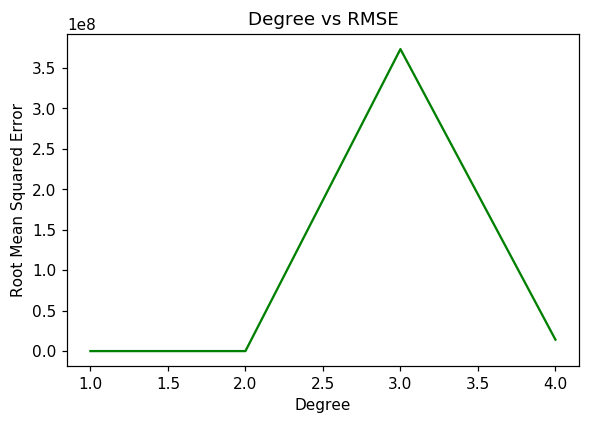

In [71]:
#Plotting the Errors 
plt.figure(dpi=110)
plt.plot(range(1,5),rmse_errors,color='g')
plt.xlabel('Degree')
plt.ylabel('Root Mean Squared Error')
plt.title('Degree vs RMSE')

From the above graph, we can conclude that a degree of **d=2** is optimal

In [75]:
poly=PolynomialFeatures(degree=2)
poly_features=poly.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(poly_features, y, test_size=0.3, random_state=101)
lm.fit(xtrain,ytrain)
yhat3=lm.predict(xtest)

In [76]:
print('Mean Absolute Error: ',round(mean_absolute_error(ytest,yhat3),2))
print('Mean Squared Error: ',round(np.sqrt(mean_squared_error(ytest,yhat3)),2))

Mean Absolute Error:  23604.81
Mean Squared Error:  35074.76


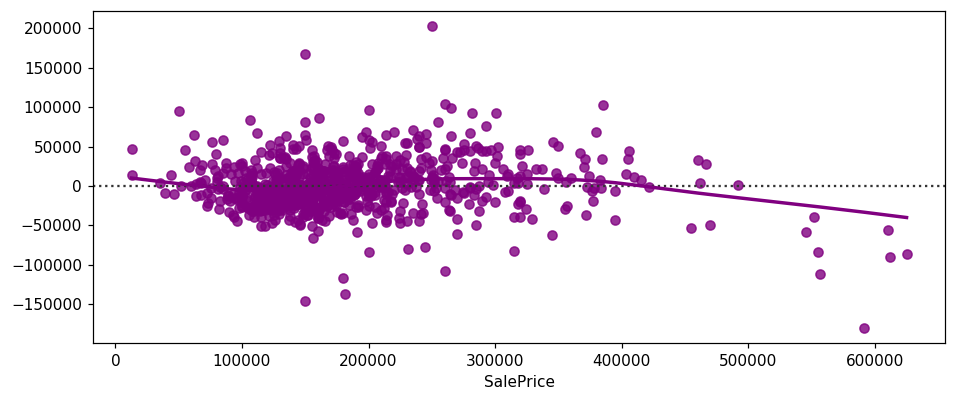

In [78]:
#Residual Plot:
plt.figure(figsize=(10,4),dpi=110)
sns.residplot(ytest,yhat3,lowess=True,color='purple')

**DataFrame of the results:**

In [79]:
my_dict={'MAE':[25842.32, 25901.08,23604.81],'RMSE':[36620.58,36890.24,35074.76]}
index=['Linear Regression','ElasticNet-GridSearchCV','Polynomial Regression']

results=pd.DataFrame(my_dict,index=index)
results

,MAE,RMSE
Linear Regression,25842.32,36620.58
ElasticNet-GridSearchCV,25901.08,36890.24
Polynomial Regression,23604.81,35074.76


## **Conclusion**: 
*From the 'results' DataFrame and the Residual plots, we can conclude that Polynomial Regression is the best fit of the three Regression algorithms used for the Housing Dataset*